# HODGKIN HUXLEY MODEL AND ITS BEHAVIOUR

In [1]:
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.hodgkin_huxley import HH
from neurodynex.tools import input_factory, plot_tools

See the neuron's ions activation inactivation,voltage and stepcurrent

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 is required. Get it with "Build Tools for Visual Studio": https://visualstudio.microsoft.com/downloads/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


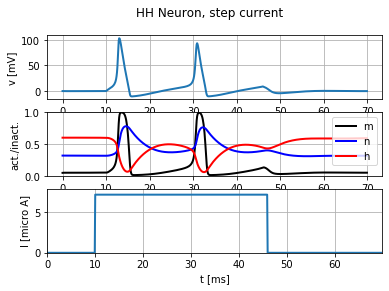

In [2]:
HH.getting_started()

# Exercise: step current response

Question 6.1.1

What is the lowest step current amplitude I_min for generating at least one spike? Determine the value by trying different input amplitudes in the code fragment:

2.1


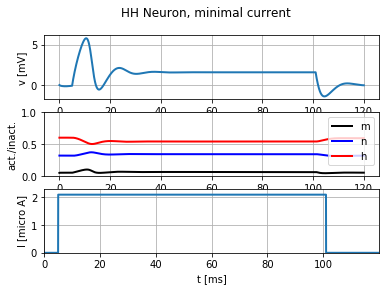

2.2


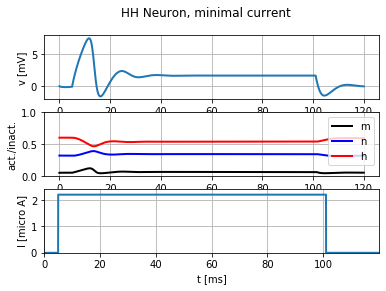

2.3


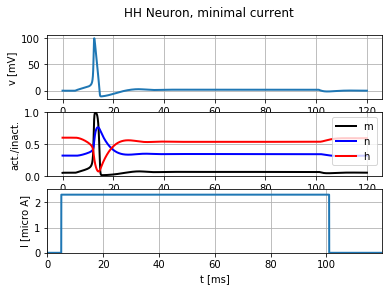

2.4


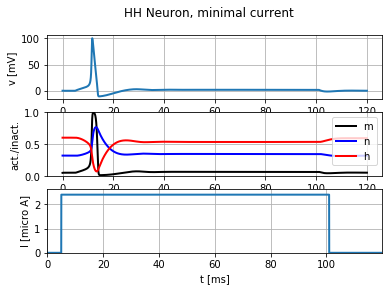

2.5


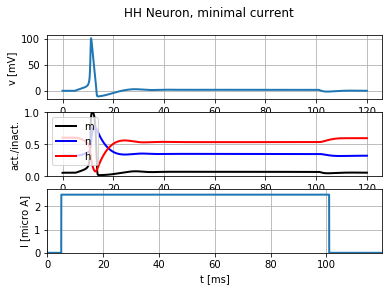

In [24]:
current_lst=[2.1,2.2,2.3,2.4,2.5]
for I_min in np.array(current_lst):
    print(I_min)
    current = input_factory.get_step_current(5, 100, b2.ms, I_min *b2.uA)
    state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
    HH.plot_data(state_monitor, title="HH Neuron, minimal current")

We see that the lowest current for generating at least one spike is around 2.3 uA.

6.1.2. Question

What is the lowest step current amplitude to generate repetitive firing?
Discuss the difference between the two regimes.

2.5


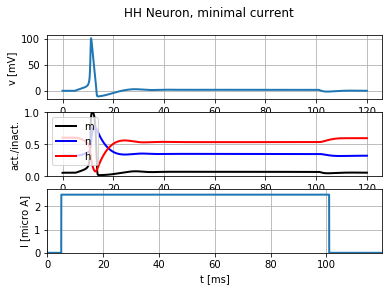

3.0


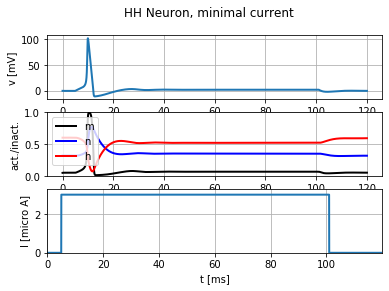

3.5


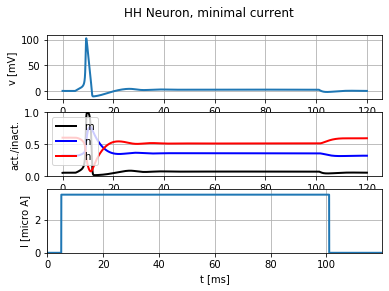

4.5


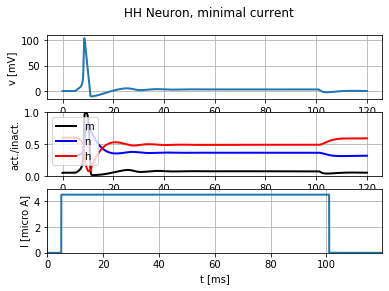

5.0


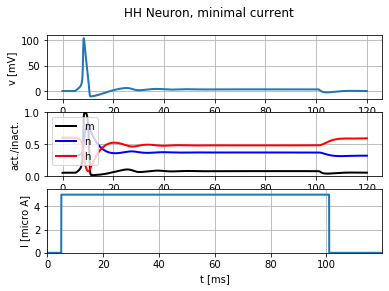

5.5


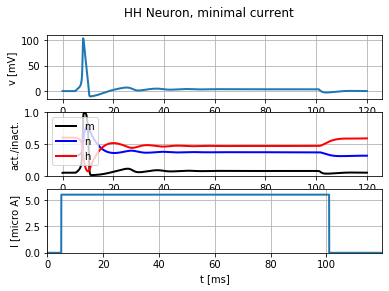

6.0


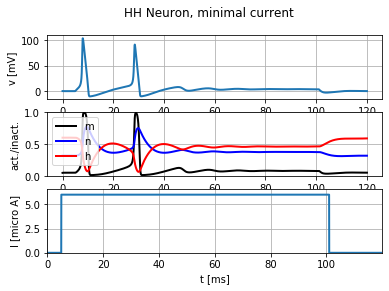

6.5


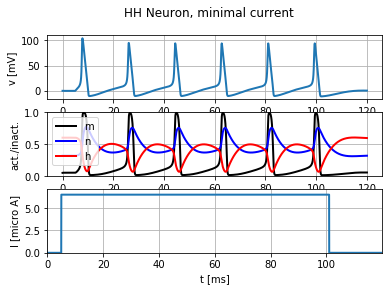

In [27]:
rep_fir_list=[2.5,3,3.5,4.5,5,5.5,6,6.5]
for I_min in np.array(rep_fir_list):
    print(I_min)
    current = input_factory.get_step_current(5, 100, b2.ms, I_min *b2.uA)
    state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
    HH.plot_data(state_monitor, title="HH Neuron, minimal current")

5.8


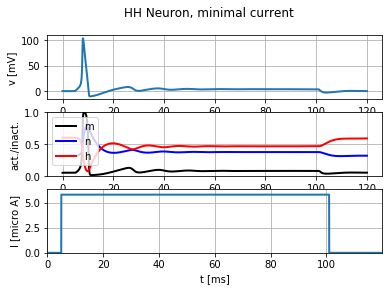

5.9


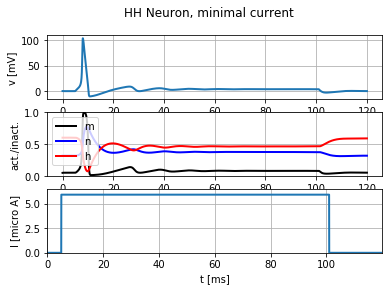

6.0


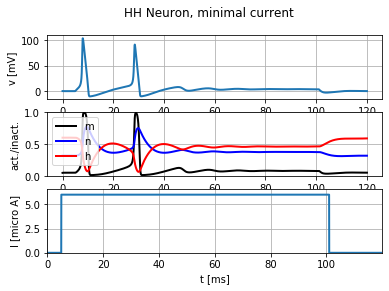

6.1


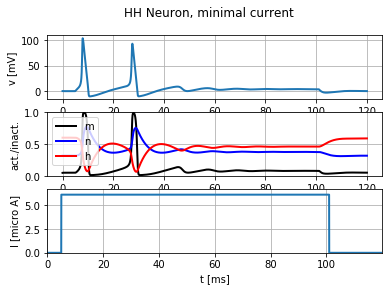

In [29]:
rep_fir_list_refined=[5.8,5.9,6.0,6.1]
for I_min in np.array(rep_fir_list_refined):
    print(I_min)
    current = input_factory.get_step_current(5, 100, b2.ms, I_min *b2.uA)
    state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
    HH.plot_data(state_monitor, title="HH Neuron, minimal current")

From the above plots we can see that for repetitive firing a  minimum of 6.0 uA current is required.

The gating variables allow repeated firing for constant current input.Where as for a single input/pulse there is no repetitive firing.

# 6.2 Exercise: slow and fast ramp current

The minimal current to elicit a spike does not just depend on the amplitude I or on the total charge Q of the current, but on the “shape” of the current

Question 6.2.1

Inject a slow ramp current into a HH neuron. The current has amplitude 0A at t in [0, 5] ms and linearly increases to an amplitude of 12.0uAmp at t=ramp_t_end. At t>ramp_t_end, the current is set to 0A. Using the following code, reduce slow_ramp_t_end to the maximal duration of the ramp current, such that the neuron does not spike. Make sure you simulate system for at least 20ms after the current stops.

voltage_slow=0.010362508767102839


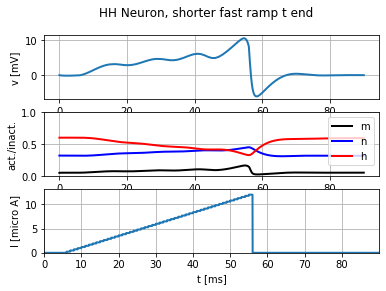

In [6]:
b2.defaultclock.dt = 0.02*b2.ms
slow_ramp_t_end = 55  # no spike. make it shorter
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, b2.ms, 0.*b2.uA, 12.0*b2.uA)
state_monitor = HH.simulate_HH_neuron(slow_ramp_current, 90 * b2.ms)
idx_t_end = int(round(slow_ramp_t_end*b2.ms / b2.defaultclock.dt))
voltage_slow = state_monitor.vm[0,idx_t_end]
print("voltage_slow={}".format(voltage_slow))
HH.plot_data(state_monitor,title="HH Neuron, shorter fast ramp t end")

6.2.2. Question

Do the same as before but for a fast ramp current: The maximal amplitude at t=ramp_t_end is 4.5uAmp. Start with fast_ramp_t_end = 8ms and then increase it until you observe a spike. Note: Technically the input current is implemented using a TimedArray. For a short, steep ramp, the one milliseconds discretization for the current is not high enough. You can create a finer resolution by setting the parameter unit_time in the function input_factory.get_ramp_current()

What is the membrane voltage at the time when the current injection stops (t=fast_ramp_t_end)?

In [8]:
b2.defaultclock.dt = 0.02*b2.ms
fast_ramp_t_end = 80  # no spike. make it longer
fast_ramp_current = input_factory.get_ramp_current(50, fast_ramp_t_end, 0.1*b2.ms, 0.*b2.uA, 4.5*b2.uA)
state_monitor = HH.simulate_HH_neuron(fast_ramp_current, 40 * b2.ms)
idx_t_end = int(round(fast_ramp_t_end*0.1*b2.ms / b2.defaultclock.dt))
voltage = state_monitor.vm[0,idx_t_end]
print("voltage_fast={}".format(voltage))

voltage_fast=0.004937049293720059


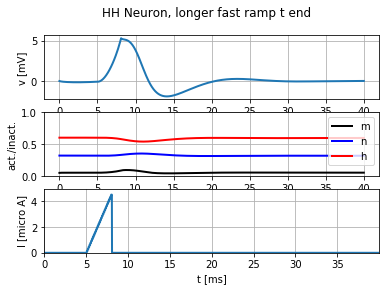

In [9]:
HH.plot_data(state_monitor,title="HH Neuron, longer fast ramp t end")

Question 6.2.3

Why are the two “threshold” voltages different?

The gating variables m,h and n behave as follows:
$m$ increases more slowly and fluctuates,$h$ decreases more slowly and fluctuates,$n$ increases more slowly and fluctuates.Slow ramp current leaks more number of electrons at the ramp interval.

# 6.3 Exercise: Rebound Spike

A HH neuron can spike not only if it receives a sufficiently strong depolarizing input current but also after a hyperpolarizing current. Such a spike is called a rebound spike.

Question 6.3.1

Inject a hyperpolarizing step current I_amp = -1 uA for 20ms into the HH neuron. Simulate the neuron for 50 ms and plot the voltage trace and the gating variables. Repeat the simulation with I_amp = -5 uA What is happening here? To which gating variable do you attribute this rebound spike?

-------------------------------------------------------------------
hyper polarizing current in uA : -1. uA


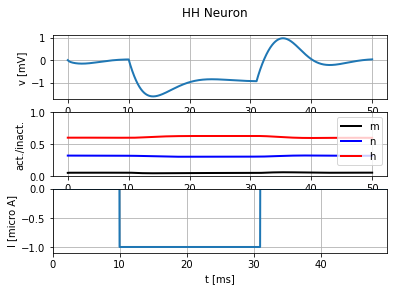

-------------------------------------------------------------------
hyper polarizing current in uA : -3. uA


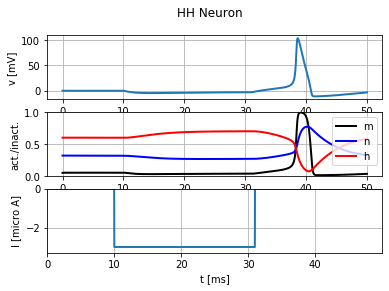

-------------------------------------------------------------------
hyper polarizing current in uA : -5. uA


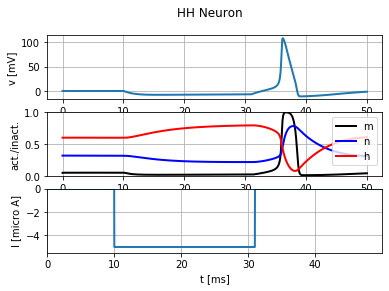

-------------------------------------------------------------------
hyper polarizing current in uA : -7. uA


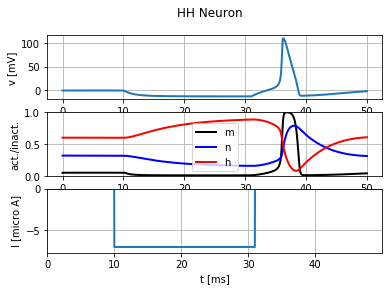

In [36]:
hyper_polarizing_amp_list=[-1,-3,-5,-7]
for hyper_polarizing_amp in hyper_polarizing_amp_list:
    b2.defaultclock.dt = 0.02*b2.ms
    hyper_polarizing_amp=(hyper_polarizing_amp)*b2.uamp
    step_current = input_factory.get_step_current(
    10,30, b2.ms, hyper_polarizing_amp)
    state_monitor = HH.simulate_HH_neuron(step_current, 50 * b2.ms)
    print("-------------------------------------------------------------------")
    print("hyper polarizing current in uA :",hyper_polarizing_amp)
    HH.plot_data(state_monitor,title="HH Neuron")

From the above plots we can see that the inactivation variable 'h' decreases and at the same time the activation variables 'm' and 'n' increase significantly.The most increase is observed in the 'm' and hence I think it is more appropriate to attribute this gating variable for this rebound spike. 

# 6.4 Exercise: Brian implementation of a HH neuron

Get the source code of the function HH.simulate_HH_neuron() (follow the link to the documentation and then click on the [source] link). Copy the function code and paste it into your Jupyter Notebook. Change the function name from simulate_HH_neuron to a name of your choice. Have a look at the source code and find the conductance parameters gK and gNa.

6.4.1 Question

In the source code of your function, change the density of sodium channels. Increase it by a factor of 1.4. Stimulate this modified neuron with a step current.

What is the minimal current leading to repetitive spiking? Explain.
Run a simulation with no input current to determine the resting potential of the neuron. Link your observation to the Goldman–Hodgkin–Katz voltage equation.
If you increase the sodium conductance further, you can observe repetitive firing even in the absence of input, why?

got the source code from :
    https://neuronaldynamics-exercises.readthedocs.io/en/latest/_modules/neurodynex/hodgkin_huxley/HH.html#simulate_HH_neuron

In [16]:
def simulate_HH_neuron(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 1.4*120 * b2.msiemens
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon


Running with gNa=1.4*gNa

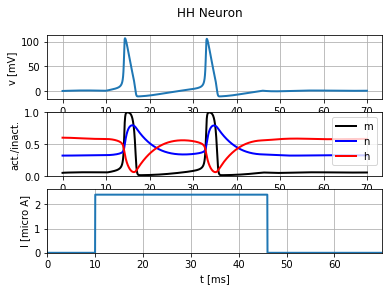

In [17]:
I=2.4*b2.uamp
step_current = input_factory.get_step_current(
    10,45, b2.ms, I)
state_monitor =simulate_HH_neuron(step_current, 70 * b2.ms)
HH.plot_data(state_monitor,title="HH Neuron")

Running with no current

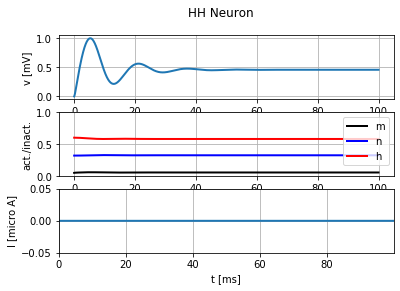

In [18]:
I=0*b2.uamp
step_current = input_factory.get_step_current(
    10,30, b2.ms, I)
state_monitor = simulate_HH_neuron(step_current,100 * b2.ms)
HH.plot_data(state_monitor,title="HH Neuron")

In [19]:
El = 10.6 * b2.mV
EK = -12 * b2.mV
ENa = 115 * b2.mV
gl = 0.3 * b2.msiemens
gK = 36 * b2.msiemens
gNa = 1.4*120 * b2.msiemens

In [20]:
print("According to Goldman–Hodgkin–Katz voltage equation",(gNa*ENa+gK*EK+gl*El)/(gNa+gK+gl))

According to Goldman–Hodgkin–Katz voltage equation 92.46784141 mV


Increasing the sodium conductance even more

In [36]:
def simulate_HH_neuron2(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 1.68*120 * b2.msiemens
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon


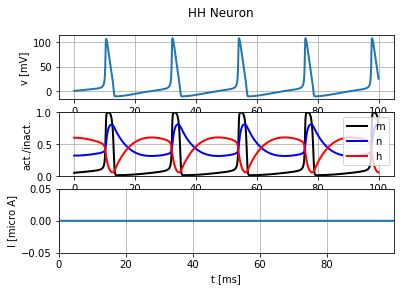

In [37]:
I=0*b2.uamp
step_current = input_factory.get_step_current(
    10,30, b2.ms, I)
state_monitor = simulate_HH_neuron2(step_current,100 * b2.ms)
HH.plot_data(state_monitor,title="HH Neuron")

The default value of sodium conductance in the source code was 120 where now we changed it to 1.68*120 msiemens,on simulating we see that even if there is no input current there is repetitve firing in the neuron  